# Assignment8

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

## Tasks, Hard Mode

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Copy of car_data.csv")

In [4]:
df

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
799,16507.070267,16229,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,0,0
800,16175.957604,19095,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
801,15731.132897,20484,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
802,15118.893228,25979,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0


In [5]:
df.dtypes

Price       float64
Mileage       int64
Make         object
Model        object
Trim         object
Type         object
Cylinder      int64
Liter       float64
Doors         int64
Cruise        int64
Sound         int64
Leather       int64
dtype: object

In [6]:
df['Price']=df['Price']

#Tasks, Part 1

1. Find the linear regression equation for mileage vs price.

In [7]:
x=df[['Mileage']]
y=df['Price']

In [8]:
#split  train and test data

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [9]:
#Linear regression model

model = LinearRegression().fit(x_train, y_train)

#model parameters

print("The equation of linear regresssion is : \t",*model.coef_,' x +',model.intercept_)

The equation of linear regresssion is : 	 -0.20364911194771423  x + 25581.391535102055


2. Chart the original data and the equation on the chart.

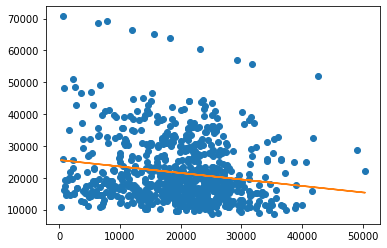

In [10]:
#plot 

plt.plot(x,y,'o')
plt.plot(x,model.predict(x))

3. Find the equation's  R2  score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [11]:
#model score

score=model.score(x,y)
print(f'The model score is : \t {score}')
if score<0.8:
  print('Equation is not a good fit.')
else:
  print('Equation is a good fit.')

The model score is : 	 0.019389425029912588
Equation is not a good fit.


#Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.

In [12]:
df.columns

Index(['Price', 'Mileage', 'Make', 'Model', 'Trim', 'Type', 'Cylinder',
       'Liter', 'Doors', 'Cruise', 'Sound', 'Leather'],
      dtype='object')

In [13]:
x=df[['Mileage','Cylinder','Liter','Doors','Cruise','Sound','Leather']]
y=df['Price']

In [14]:
#split  train and test data

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [15]:
#Regression Equation

from sklearn.model_selection import train_test_split
names=['Mileage','Cylinder','Liter','Doors','Cruise','Sound','Leather']
for i in range(len(names)):
  x=df[[names[i]]]
  y=df["Price"]
  x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)
  model = LinearRegression().fit(x_train, y_train)
  print(f"The equation of linear regresssion for {names[i]} is : \t",*model.coef_,' x +',model.intercept_)

The equation of linear regresssion for Mileage is : 	 -0.1744268415361204  x + 24978.087943612354
The equation of linear regresssion for Cylinder is : 	 4142.785178781943  x + -353.67987053523393
The equation of linear regresssion for Liter is : 	 4995.751102352382  x + 6296.751165720343
The equation of linear regresssion for Doors is : 	 -2041.8062104701542  x + 28709.25032421899
The equation of linear regresssion for Cruise is : 	 10100.147397786744  x + 13986.643171775559
The equation of linear regresssion for Sound is : 	 -1934.1262224004788  x + 22819.839169551364
The equation of linear regresssion for Leather is : 	 3329.1111191315385  x + 19118.889020207087


2. 
Find the equation's  R2  score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [16]:
#model score

from sklearn.model_selection import train_test_split
names=names=['Mileage','Cylinder','Liter','Doors','Cruise','Sound','Leather']
for i in range(len(names)):
  x=df[[names[i]]]
  y=df["Price"]
  x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)
  model = LinearRegression().fit(x_train, y_train)
  score=model.score(x,y)*100
  print(f"The model score for {names[i]} is : \t",score)

The model score for Mileage is : 	 2.0144535149309584
The model score for Cylinder is : 	 32.35310120780881
The model score for Liter is : 	 31.136040833343024
The model score for Doors is : 	 1.7617455737110488
The model score for Cruise is : 	 18.491632173245986
The model score for Sound is : 	 1.410367586408967
The model score for Leather is : 	 2.4315099706046395


3. Find the combination of the factors that is the best predictor for price.

In [17]:
x=df[['Mileage','Cylinder','Liter','Doors','Cruise','Sound','Leather']]
y=df['Price']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)
model = LinearRegression().fit(x_train, y_train)
score=model.score(x,y)*100
score

44.495764645451985

- Best combination is using all the seven features.

- Indivisually the best features are cylinder, liter and cruise.

#Tasks, Hard Mode


1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.

In [18]:
dummy = pd.get_dummies(df[['Make','Model','Type']])

In [19]:
dummy.columns

Index(['Make_Buick', 'Make_Cadillac', 'Make_Chevrolet', 'Make_Pontiac',
       'Make_SAAB', 'Make_Saturn', 'Model_9-2X AWD', 'Model_9_3',
       'Model_9_3 HO', 'Model_9_5', 'Model_9_5 HO', 'Model_AVEO',
       'Model_Bonneville', 'Model_CST-V', 'Model_CTS', 'Model_Cavalier',
       'Model_Century', 'Model_Classic', 'Model_Cobalt', 'Model_Corvette',
       'Model_Deville', 'Model_G6', 'Model_GTO', 'Model_Grand Am',
       'Model_Grand Prix', 'Model_Impala', 'Model_Ion', 'Model_L Series',
       'Model_Lacrosse', 'Model_Lesabre', 'Model_Malibu', 'Model_Monte Carlo',
       'Model_Park Avenue', 'Model_STS-V6', 'Model_STS-V8', 'Model_Sunfire',
       'Model_Vibe', 'Model_XLR-V8', 'Type_Convertible', 'Type_Coupe',
       'Type_Hatchback', 'Type_Sedan', 'Type_Wagon'],
      dtype='object')

In [20]:
dummy

,Make_Buick,Make_Cadillac,Make_Chevrolet,Make_Pontiac,Make_SAAB,Make_Saturn,Model_9-2X AWD,Model_9_3,Model_9_3 HO,Model_9_5,...,Model_STS-V6,Model_STS-V8,Model_Sunfire,Model_Vibe,Model_XLR-V8,Type_Convertible,Type_Coupe,Type_Hatchback,Type_Sedan,Type_Wagon
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
800,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
801,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
802,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [21]:
df1=pd.concat([df['Price'],dummy],axis=1)

In [22]:
df1=df1.merge(dummy,left_index=True,right_index=True)
df1.head()

,Price,Make_Buick_x,Make_Cadillac_x,Make_Chevrolet_x,Make_Pontiac_x,Make_SAAB_x,Make_Saturn_x,Model_9-2X AWD_x,Model_9_3_x,Model_9_3 HO_x,...,Model_STS-V6_y,Model_STS-V8_y,Model_Sunfire_y,Model_Vibe_y,Model_XLR-V8_y,Type_Convertible_y,Type_Coupe_y,Type_Hatchback_y,Type_Sedan_y,Type_Wagon_y
0,17314.103129,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,17542.036083,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,16218.847862,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,16336.913140,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,16339.170324,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [23]:
#model score using Dummy variables 

x=df1.drop(columns='Price')
y=df['Price']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)
model = LinearRegression().fit(x_train, y_train)
score=model.score(x,y)*100
score

95.77481436708266

2. Find the best combination of factors to predict price.

In [24]:
from sklearn.model_selection import train_test_split
x=df1.drop(columns='Price').columns
for i in range(len(x)):
  x1=df1[[x[i]]]
  y1=df1["Price"]
  x_train,x_test,y_train,y_test = train_test_split(x1,y1,test_size=0.2,random_state=2)
  model = LinearRegression().fit(x_train, y_train)
  score=model.score(x1,y1)*100
  print(f"The model score for {x[i]} is : \t",score)

The model score for Make_Buick_x is : 	 -0.014289837098679925
The model score for Make_Cadillac_x is : 	 43.45356622371723
The model score for Make_Chevrolet_x is : 	 16.31001842287678
The model score for Make_Pontiac_x is : 	 1.992595304923117
The model score for Make_SAAB_x is : 	 11.211066998082686
The model score for Make_Saturn_x is : 	 4.44567394465305
The model score for Model_9-2X AWD_x is : 	 0.029106301008352542
The model score for Model_9_3_x is : 	 1.5180818065350543
The model score for Model_9_3 HO_x is : 	 4.404975497805996
The model score for Model_9_5_x is : 	 2.949184575283681
The model score for Model_9_5 HO_x is : 	 1.184663453300594
The model score for Model_AVEO_x is : 	 9.236729413464529
The model score for Model_Bonneville_x is : 	 -0.02905810061002434
The model score for Model_CST-V_x is : 	 7.200168203484969
The model score for Model_CTS_x is : 	 1.042237345630459
The model score for Model_Cavalier_x is : 	 5.890127803288204
The model score for Model_Century_x 

- Best factors to predict the price are as : 

Make_Cadillac_x, Make_Cadillac_y, Type_Convertible_x, Type_Convertible_y, Model_XLR-V8_y, 